<div id="bookcontent" style="display: block;">
					<div id="theory"><h2>Apa itu Clustering dan Algoritma K-Prototypes</h2><p><strong>Clustering</strong> adalah proses pembagian objek-objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara satu objek dengan yang lain.</p>
<p>Terdapat beberapa algoritma untuk melakukan clustering ini. Salah satu yang populer adalah k-means.</p>
<p><strong>K-means</strong> itu sendiri biasa nya hanya digunakan untuk data-data yang <strong>bersifat numerik</strong>. Sedangkan untuk yang <strong>bersifat kategorikal</strong> saja, kita bisa menggunakan <strong>k-modes</strong>.</p>
<p>Lalu bagaimana apabila di data kita terdapat gabungan kategorikal dan numerikal variabel? Jawabannya kita bisa menggunakan algoritma k-prototype yang merupakan gabungan dari k-means dan k-modes. Hal ini bisa di lakukan dengan menggunakan library k-modes yang di dalamnya terdapat modul kprototype.</p>
<p>Untuk menggunakan algoritma kprototype kamu perlu memasukkan jumlah cluster yang di kehendaki dan juga memberikan index kolom untuk kolom-kolom yang bersifat kategorikal.</p>
<p>Untuk lebih lengkapnya kamu bisa melihat dokumentasi dari kprototype melalui link berikut https://github.com/nicodv/kmodes</p></div>
					<div class="btn-skip">
						<button class="btn btn-primary" id="btn_skips">Next &gt;
					</button></div>
				</div>

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Mencari Jumlah Cluster yang Optimal</h2><p>Salah satu parameter penting yang harus di masukkan pada algoritma kprototype adalah jumlah cluster yang diinginkan. Oleh karena itu, kamu perlu mencari jumlah cluster yang optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunnakan bantuan 'elbow plot'.</p>
<p>Elbow plot ini dapat di buat dengan cara&nbsp; memvisualisasikan total jarak seluruh data kita ke pusat cluster nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.</p>
<p>&nbsp;</p>
<p>Untuk melakukan hal ini kamu perlu menjalankan algoritma kprototypes dengan berbagai jumlah cluster. Selanjutnya kamu juga menyimpan nilai cost_ dan memvisualisasikan nya dengan line plot atau point plot.</p>
<p><strong>Tugas:</strong></p>
<p>Buatlah elbow plot dengan jumlah cluster 2 sampai 9 dan tentukan jumlah cluster yang optimal.</p>
<p>Jika di lakukan dengan benar, kamu akan mendapatkan hasil sebagai berikut.</p>
<p>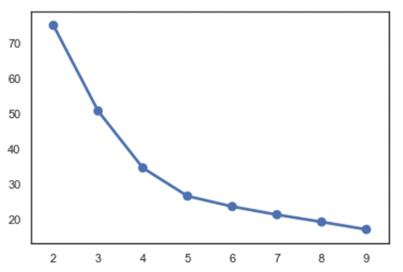</p>
<p>Dari hasil tersebut, kamu dapat mengetahui titik siku dari plot tersebut adalah pada saat k = 5. Sehingga kamu memutuskan untuk menggunakan 5 sebagai jumlah cluster optimalnya.</p></div>

In [2]:
!pip install kmodes

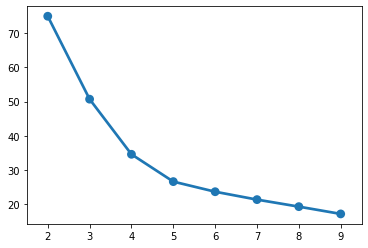

In [3]:
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
df_model = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/df-customer-segmentation.csv')

# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost[k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Membuat Model</h2><p>Selanjutnya kamu dapat melakukan pembuatan model dengan jumlah kluster yang sudah di dapat pada tahap sebelumnya yaitu 5 dan menyimpan hasilnya sebagai pickle file.</p>
<p><strong>Tugas:</strong></p>
<p>Buatlah model Kprototypes dengan nilai k = 5 dan random state 75. Kemudian simpan hasilnya dalam bentuk pickle.</p></div>

In [4]:
import pickle  
from kmodes.kmodes import KModes 
from kmodes.kprototypes import KPrototypes  
  
kproto = KPrototypes(n_clusters=5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Menggunakan Model</h2><p>Model yang sudah kamu buat dapat di gunakan untuk menentukan setiap pelanggan masuk ke dalam cluster yang mana. Kali ini kamu akan menggunakan model tersebut untuk menentukan segmen pelanggan yang ada di data set.</p>
<p><strong>Tugas:</strong></p>
<p>Tentukan cluster setiap pelanggan yang ada di dataset menggunakan model kproto yang sudah di buat sebelumnya. Kemudian gabungkan hasil prediksi tersebut dengan data awal (df) sehingga kita mendapatkan data pelanggan beserta nama cluster nya.</p>
<p>Jika dilakukan dengan benar, maka kamu akan melihat hasil sebagai berikut:</p>
<p>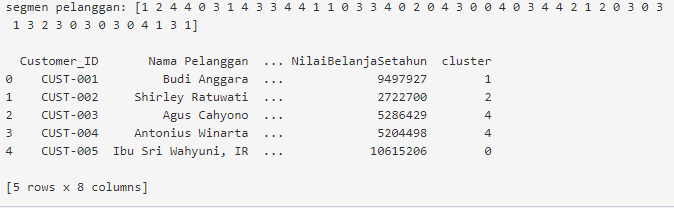</p></div>

In [17]:
import pandas as pd
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t") 
# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()
df_final['cluster'] = clusters
df_final

segmen pelanggan: [1 2 4 4 0 3 1 4 3 3 4 4 1 1 0 3 3 4 0 2 0 4 3 0 0 4 0 3 4 4 2 1 2 0 3 0 3
 1 3 2 3 0 3 0 3 0 4 1 3 1]



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,4
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,4
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0
5,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,3
6,CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,1
7,CUST-008,Danang Santosa,Pria,52,Professional,Cluster,5223569,4
8,CUST-009,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,3
9,CUST-010,Mario Setiawan,Pria,33,Professional,Cluster,5257448,3


<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Menampilkan Cluster Tiap Pelanggan</h2><p>Setelah kamu menggabungkan data awal pelanggan dan clusternya, kamu perlu untuk menampilkan dan mengobservasi hasilnya untuk membantu kamu dalam memberi nama tiap cluster berdasarkan karakteristiknya.</p>
<p><strong>Tugas: </strong></p>
<p>Tampilkan data pelanggan yang di kelompokkan berdasarkan nomor clusternya. Jika dilakukan dengan benar, makan kamu akan mendapatkan hasil sebagai berikut :</p>
<p>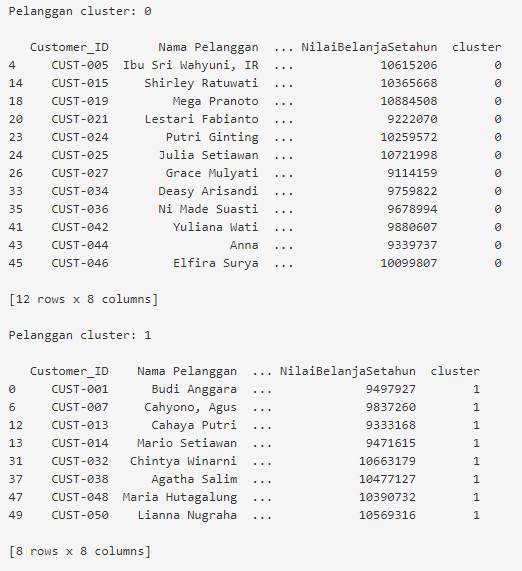</p>
<p>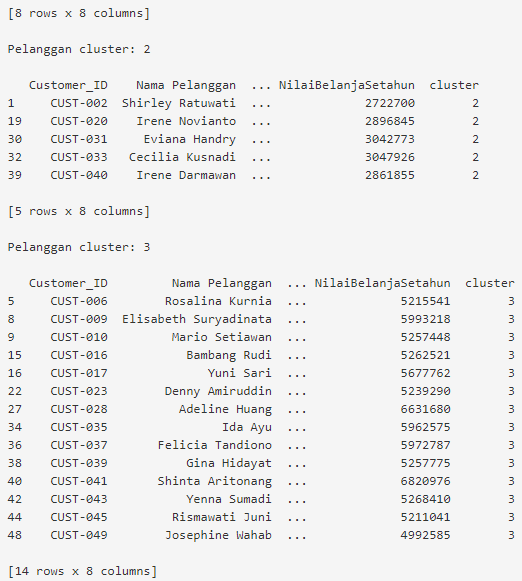</p>
<p>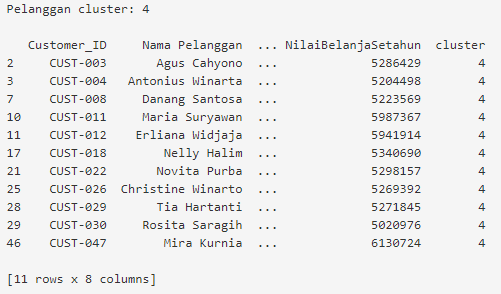</p></div>

In [6]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,5):  
    print('\nPelanggan cluster: {}\n'.format(i))
    print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0

   Customer_ID       Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
4     CUST-005  Ibu Sri Wahyuni, IR  ...            10615206        0
14    CUST-015     Shirley Ratuwati  ...            10365668        0
18    CUST-019         Mega Pranoto  ...            10884508        0
20    CUST-021     Lestari Fabianto  ...             9222070        0
23    CUST-024        Putri Ginting  ...            10259572        0
24    CUST-025       Julia Setiawan  ...            10721998        0
26    CUST-027        Grace Mulyati  ...             9114159        0
33    CUST-034       Deasy Arisandi  ...             9759822        0
35    CUST-036       Ni Made Suasti  ...             9678994        0
41    CUST-042         Yuliana Wati  ...             9880607        0
43    CUST-044                 Anna  ...             9339737        0
45    CUST-046         Elfira Surya  ...            10099807        0

[12 rows x 8 columns]

Pelanggan cluster: 1

   Customer_ID    Nam

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Visualisasi Hasil Clustering - Box Plot</h2><p>Kamu juga membuat visualiasi hasil clustering untuk dapat memudahkan kamu melakukan penamaan di tiap-tiap cluster.</p>
<p><strong>Tugas:</strong></p>
<p>Buatlah boxlplot untuk memvisualisasikan setiap variabel tiap pelanggan yang dibagi berdasarkan nama clusternya. Jika benar maka kamu akan mendapatkan hasil sebagai berikut:</p>
<p>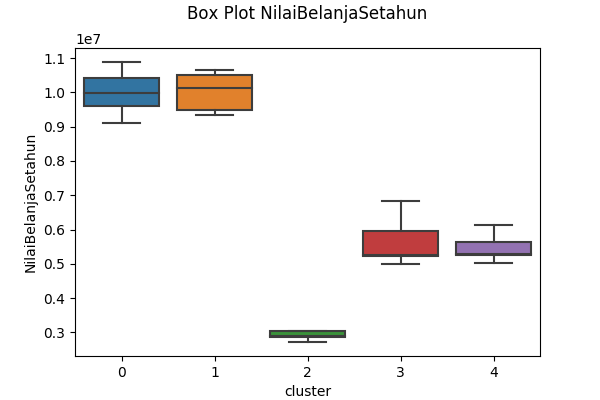</p></div>

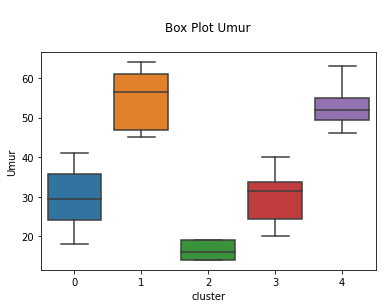

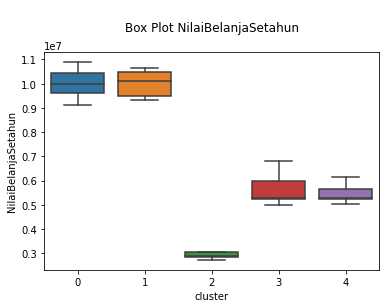

In [7]:
import matplotlib.pyplot as plt
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Visualisasi Hasil Clustering - Count Plot</h2><p>Kamu juga membuat visualiasi hasil clustering untuk dapat memudahkan kamu melakukan penamaan di tiap-tiap cluster.</p>
<p><strong>Tugas:</strong></p>
<p>Buatlah countplot untuk memvisualisasikan setiap variabel tiap pelanggan yang dibagi berdasarkan nama clusternya. Jika benar maka kamu akan mendapatkan hasil sebagai berikut:</p>
<p>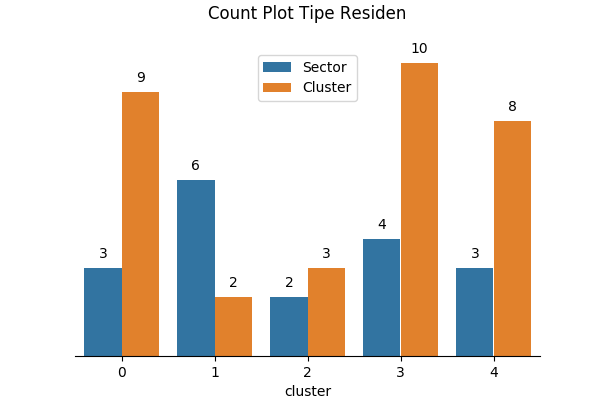</p></div>

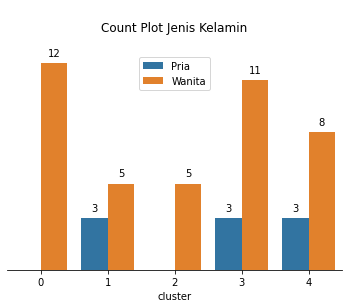

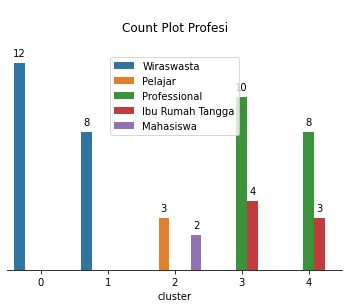

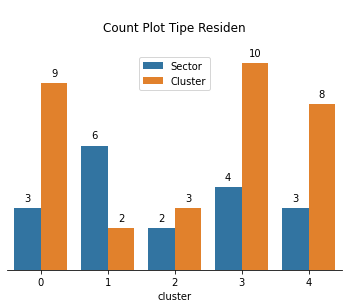

In [8]:
import matplotlib.pyplot as plt  
# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend(loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Menamakan Cluster</h2><p>Dari hasil observasi yang dilakukan kamu dapat memberikan nama segmen dari tiap tiap nomor kluster nya. Yaitu:</p>
<ul>
<li>Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.</li>
<li>Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswata yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.</li>
<li>Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.</li>
<li>Cluster 3: Gold Young Member, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahun nya mendekati 6 juta.</li>
<li>Cluster 4: Gold Senior Member, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahun nya mendekati 6 juta.</li>
</ul>
<p><strong>Tugas:</strong></p>
<p>Tambahkan satu buah kolom dengan nama segmen. Kemudian isilah kolom ini dengan nama segmen dari tiap tiap pelanggan berdasarkan nilai cluster nya dan tampilkan lima data teratas.</p>
<p>Jika berhasil, maka kamu akan mendapatkan hasil sebagai berikut :</p>
<p>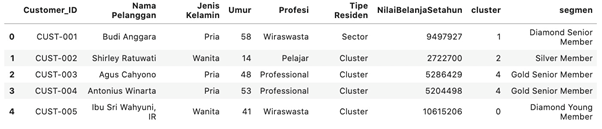</p></div>

In [14]:
# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1,Diamond Senior Member
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2,Silver Member
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,4,Gold Senior Member
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,4,Gold Senior Member
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0,Diamond Young Member


Cluster mana yang merupakan cluster yang paling baik?
 cluster 4

<div id="bookcontent" style="display: block;">
					<div id="theory"><h2>Kesimpulan </h2><p>Yeay! Akhirnya kamu sudah berhasil melakukan segmentasi pelanggan dan mendapatkan nama yang cocok untuk masing masing cluster. Yaitu:</p>
<ul>
<li>Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.</li>
<li>Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswata yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.</li>
<li>Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.</li>
<li>Cluster 3: Gold Young Member, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahun nya mendekati 6 juta.</li>
<li>Cluster 4: Gold Senior Member, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahun nya mendekati 6 juta.</li>
</ul>
<p>Setelah menyampaikan hasil yang kamu dapatkan ke atasan kamu. Atasan kamu sangat puas dengan hasil yang kamu berikan. Selanjutnya dia memberikan tantangan tambahan kepada kamu untuk mengoperasikan model yang kamu buat agar dapat di gunakan untuk memprediksi data baru.</p></div>
					<div class="btn-skip">
						<button class="btn btn-primary" id="btn_skips">Next &gt;
					</button></div>
				</div>

<div id="bookcontent" style="display: block;">
					<div id="theory"><h2>Tips</h2><p>Pada aplikasi di industri proses penentuan cluster yang optimum bisa dilakukan juga dengan melihat matriks evaluasi lainnya seperti sillhoute score dan callinski-harabaz score. Untuk detailnya bisa dilihat di dokumentasi sklearn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation).</p>
<p>Selain itu penentuan jumlah cluster yang optimal juga perlu mepertimbangkan masukan dari tim yang akan menggunakan model nya. Sehingga bisa menghasilkan cluster yang sesuai dengan kebutuhan mereka dan juga bagaimana cara mereka akan memperlakukan segmen-segmen ini.</p>
<p>Tantangan lainnya adalah jumlah data yang jauh lebih banyak di banding dengan data set yang kamu gunakan untuk latihan ini. Sehingga waktu pemrosesan datanya dan pembuatan model nya akan menjadi lebih lama.</p></div>
					<div class="btn-skip">
						<button class="btn btn-primary" id="btn_skips">Next &gt;
					</button></div>
				</div>

<div id="bookcontent" style="display: block;">
					<div id="theory"><h2>Pendahuluan </h2><p>Model yang sudah dibuat harus bisa di gunakan sehari hari untuk memprediksi data baru. Untuk itu kamu harus memperisapkan datanya kembali dan kemudian melakukan prediksi dengan parameter dan model yang sudah di buat.</p>
<p>Jika kamu dapat mengoperasionalkan model tersebut, maka tim bisnis dapat dengan cepat mengetahui segmen dari pelanggan dan juga bisa mengatur strategi marketing mereka dengan lebih efisien.</p></div>
					<div class="btn-skip">
						<button class="btn btn-primary" id="btn_skips">Next &gt;
					</button></div>
				</div>

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Mempersiapkan Data Baru</h2><p>Disini kamu membuat contoh data baru untuk di prediksi dengan model yang sudah di buat. Hal ini kamu lakukan dengan membuat satu buah dataframe yang berisi informasi pelanggan.</p>
<p><strong>Tugas:</strong></p>
<p>Buatlah satu dataframe yang berisi informasi pelanggan dan tampilkan hasilnya.</p>
<p>Jika berhasil kamu akan mendapatkan hasil sebagai berikut:</p>
<p>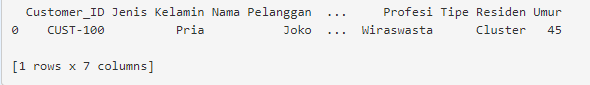</p></div>

In [10]:
# Data Baru  
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]  
  
# Membuat Data Frame  
new_df = pd.DataFrame(data)  
  
# Melihat Data  
print(new_df)


  Customer_ID Nama Pelanggan  ... Tipe Residen  NilaiBelanjaSetahun
0    CUST-100           Joko  ...      Cluster              8230000

[1 rows x 7 columns]


<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Membuat Fungsi Data Pemrosesan</h2><p>Selanjutnya kamu perlu membuat fungsi untuk melakukan pemrosesan data berdasarkan paramater yang sama pada saat kita melakukan permodelan dan kita panggil dengan data baru kita.</p>
<p>Jadi fungsi ini nantinya akan bisa di gunakan untuk:</p>
<p><strong><em>Melakukan konversi data kategorikal menjadi numerik</em></strong></p>
<p>Dari proses sebelumnya kita tau representasi tiap kode dan maksudnya yaitu:</p>
<p><em>Jenis Kelamin</em></p>
<ul>
<li>0 : Pria</li>
<li>1 : Wanita</li>
</ul>
<p><em>Profesi </em></p>
<ul>
<li>0 : Ibu Rumah Tangga</li>
<li>1 : Mahasiswa</li>
<li>2 : Pelajar</li>
<li>3 : Professional</li>
<li>4 : Wiraswasta</li>
</ul>
<p><em>Tipe Residen</em></p>
<ul>
<li>1 : Sector</li>
<li>0 : Cluster</li>
</ul>
<p>Selanjutnya kita harus membuat fungsi untuk merubah data kategorikal menjadi numerik berdasarkan referensi tersebut.</p>
<p><strong><em>Melakukan standardisasi kolom numerikal</em></strong></p>
<p>Untuk melakukan standardisasi dengan variable yang sama pada saat permodelan kita perlu menggunakan nilai rata-rata dan standard deviasi dari tiap variabel pada saat kita melakukan permodelan. Yaitu:</p>
<p><em>Umur</em></p>
<ul>
<li>Rata - rata: 37.5</li>
<li>Standard Deviasi: 14.7</li>
</ul>
<p><em>NilaiBelanjaSetahun</em></p>
<ul>
<li>Rata - rata: 7069874.8</li>
<li>Standard Deviasi: 2590619.0</li>
</ul>
<p>Dari nilai-nilai tersebut kita dapat menghitung nilai standardisasi (z) dengan menggunakan rumus Z = (x - u)/s dengan x adalah tiap nilai, u adalah rata-rata dan s adalah standard deviasi.</p>
<p><strong><em>Menggabungkan hasil dua proses sebelumnya menjadi satu data frame</em></strong></p>
<p>Selanjutnya kamu perlu menggabungkan kedua perintah tersebut dan menjadi data frame yang siap untuk dilakukan permodelan.</p></div>

In [11]:
def data_preprocess(data):  
    # Konversi Kategorikal data  
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
      
    df_encode = data[kolom_kategorikal].copy()  
  
    ## Jenis Kelamin   
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })  
      
    ## Profesi  
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## Tipe Residen  
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Standardisasi Numerical Data  
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardisasi Kolom Umur  
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7  
      
    ## Standardisasi Kolom Nilai Belanja Setahun  
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Menggabungkan Kategorikal dan numerikal data  
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Menjalankan fungsi  
new_df_model = data_preprocess(new_df)  
  
print(new_df_model)

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Memanggil Model dan Melakukan Prediksi</h2><p>Setelah kamu memiliki data yang siap di gunakan, saatnya memanggil model yang sudah di simpan sebelumnya dan dilanjutkan dengan melakukan prediksi.</p>
<p>Untuk melakukan hal tersebut, kamu perlu membuat prosesnya menjadi dalam satu fungsi yang bernama modelling dengan menggunakan data baru sebagai input nya.</p>
<p><strong>Tugas:</strong></p>
<p>Buatlah fungsi yang bisa di gunakan untuk memanggil model dan melakukan prediksi serta menyimpan hasilnya nya kedalam satu dataframe. Jika berhasil di panggil, kita akan mendapatkan cluster dari data yang kita masukan.</p></div>

In [12]:
def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters = kpoto.predict(data,categorical=[0,1,2])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  
  
print(clusters)


[1]


<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Menamakan Segmen</h2><p>Sama dengan sebelumnya, kamu perlu membuat fungsi untuk melakukan proses ini. Nama cluster yang sudah didapat di tahap sebelumnya perlu di rubah menjadi nama segmen agar lebih mudah diidentifikasi.</p>
<p><strong>Tugas:</strong></p>
<p>Disini kamu harus membuat fungsi yang bernama menamakan_segmen dengan data asli dan clusters sebagai inputnya. Jika berhasil, kamu akan mendapatkan hasil sebagai berikut:</p>
<p>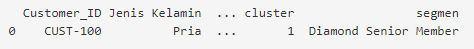</p></div>

In [13]:
def menamakan_segmen (data_asli, clusters):  
      
    # Menggabungkan cluster dan data asli  
    final_df = data_asli.copy()  
    final_df['cluster'] = clusters
      
    # Menamakan segmen  
    final_df['segmen'] = final_df['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_df
  
# Menjalankan Fungsi  
new_final_df = menamakan_segmen(new_df,clusters)  
  
print(new_final_df)


  Customer_ID Nama Pelanggan  ... cluster                 segmen
0    CUST-100           Joko  ...       1  Diamond Senior Member

[1 rows x 9 columns]


<div id="bookcontent" style="display: block;">
					<div id="theory"><h2>Kesimpulan </h2><p>Akhirnya, kamu juga berhasil membuat alur proses untuk mengoperasikan model. Selanjutnya kamu dapat menjadwalkan kode ini. Apakah akan dijalankan secara real-time setiap ada data masuk atau secara batch misal satu hari sekali.</p>
<p><strong>Tips:</strong></p>
<p>Di industri khususnya untuk mengorperasikan model bisa bermacam-macam caranya. Ada yang membuat dengan python script lalu di buat interval jam jalan nya. Selain itu bisa juga menggunakan bantuan software untuk melakukan deployment. Hal ini akan tergantung di mana kamu bekerja.</p></div>
					<div class="btn-skip">
						<button class="btn btn-primary" id="btn_skips">Next &gt;
					</button></div>
				</div>

<div id="bookcontent" style="display: block;">
					<div id="theory"><h2>Penutup</h2><p>Kamu berhasilkan menyelesaikan tugas pertama kamu sebagai data scientist di tempat baru kamu. Dalam perjalanannya kamu belajar untuk:</p>
<ul>
<li>Menyiapkan library dan data yang akan digunakan</li>
<li>Melakukan explorasi data numerik dan kategorikal menggunakan boxplot, distplot dan juga countplot</li>
<li>Melakukan pemrosesan awal data dengan merubah kolom text menjadi numerik dan melakukan standardisasi kolom numerik</li>
<li>Membuat dan mengoptimalkan model menggunakan algoritma k-prototype</li>
<li>Menggunakan model untuk meprediksi data-data baru.</li>
</ul>
<p>Kamu pun saat ini siap untuk mendapatkan tugas-tugas selanjutnya dengan tantangan yang berbeda dan berkontribusi lebih banyak lagi.</p>
<p>Di industri tugas data scientist bisa sangat bervariasi, sehingga kamu perlu selalu meningkatkan kemampuan diri dengan belajar dan menyelesaikan beberapa studi kasus.</p>
<p><strong>Terima Kasih!</strong></p></div>
					<div class="btn-skip">
						<button class="btn btn-primary" id="btn_skips">Next &gt;
					</button></div>
				</div>